# Imports

In [33]:
import numpy as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
#Bring in csv using pandas
df= pd.read_csv('samsung_health.csv')

In [3]:
# Looking at data types and amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5777 entries, 0 to 5776
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   heart_rate   5777 non-null   int64 
 1   max          5777 non-null   int64 
 2   start_time   5777 non-null   object
 3   end_time     5777 non-null   object
 4   create_time  5777 non-null   object
 5   update_time  5777 non-null   object
 6   min          5777 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 316.1+ KB


In [4]:
df.isnull().sum() # verify number null values in each column

heart_rate     0
max            0
start_time     0
end_time       0
create_time    0
update_time    0
min            0
dtype: int64

In [5]:
#Looking at shape ( # of rows and columns)
df.shape

(5777, 7)

In [6]:
#Looking at first 10 values
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,"06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM",74
1,62,79,"06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM",62
2,68,79,"06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM",62
3,75,79,"06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM",62
4,69,79,"06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM",62
5,69,108,"06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM",62
6,68,79,"06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM",62
7,69,108,"06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM",62
8,79,79,"06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM",74
9,65,79,"06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM",65


# Takeways:
- No null values present
- decide whether to change datatypes of start_time, end_time, create_time, and update_time

# Prepare

In [7]:
# Change times to datetime format
df[['start_time','end_time', 'update_time']] = df[['start_time','end_time', 'update_time']].apply(pd.to_datetime)

In [8]:
# Verify datatype was changed for start time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5777 entries, 0 to 5776
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   heart_rate   5777 non-null   int64         
 1   max          5777 non-null   int64         
 2   start_time   5777 non-null   datetime64[ns]
 3   end_time     5777 non-null   datetime64[ns]
 4   create_time  5777 non-null   object        
 5   update_time  5777 non-null   datetime64[ns]
 6   min          5777 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 316.1+ KB


In [9]:
df[df['start_time'] != df['end_time']]

,heart_rate,max,start_time,end_time,create_time,update_time,min
33,80,115,2021-06-14 19:00:00,2021-06-14 19:59:31,"06/14/2021, 7:59:31 PM",2021-06-14 19:59:31,79
34,93,121,2021-06-14 20:00:00,2021-06-14 20:22:29,"06/14/2021, 8:22:29 PM",2021-06-14 20:22:29,72
35,58,142,2021-06-14 22:00:00,2021-06-14 22:59:43,"06/14/2021, 10:59:43 PM",2021-06-15 15:13:47,52
36,55,83,2021-06-14 23:00:00,2021-06-14 23:59:43,"06/14/2021, 11:59:43 PM",2021-06-14 23:59:43,53
37,68,92,2021-06-15 00:00:00,2021-06-15 00:59:42,"06/15/2021, 12:59:42 AM",2021-06-15 00:59:42,51
...,...,...,...,...,...,...,...
5742,74,116,2021-08-22 18:00:00,2021-08-22 18:59:52,"08/22/2021, 6:59:52 PM",2021-08-22 18:59:52,67
5746,71,98,2021-08-22 19:00:00,2021-08-22 19:59:51,"08/22/2021, 7:59:51 PM",2021-08-22 19:59:51,60
5760,62,92,2021-08-22 20:00:00,2021-08-22 20:59:50,"08/22/2021, 8:59:50 PM",2021-08-22 20:59:50,55
5773,56,96,2021-08-22 21:00:00,2021-08-22 21:59:50,"08/22/2021, 9:59:50 PM",2021-08-22 21:59:50,49


- ignore these data points for now.

In [10]:
#Look at first 10 values
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,2021-06-14 15:30:59,2021-06-14 15:30:59,"06/14/2021, 3:30:59 PM",2021-06-14 15:30:59,74
1,62,79,2021-06-14 16:10:59,2021-06-14 16:10:59,"06/14/2021, 4:10:59 PM",2021-06-14 16:10:59,62
2,68,79,2021-06-14 16:50:59,2021-06-14 16:50:59,"06/14/2021, 4:50:59 PM",2021-06-14 16:50:59,62
3,75,79,2021-06-14 17:10:59,2021-06-14 17:10:59,"06/14/2021, 5:10:59 PM",2021-06-14 17:10:59,62
4,69,79,2021-06-14 17:00:59,2021-06-14 17:00:59,"06/14/2021, 5:00:59 PM",2021-06-14 17:00:59,62
5,69,108,2021-06-14 18:10:59,2021-06-14 18:10:59,"06/14/2021, 6:10:59 PM",2021-06-14 18:10:59,62
6,68,79,2021-06-14 16:20:59,2021-06-14 16:20:59,"06/14/2021, 4:20:59 PM",2021-06-14 16:20:59,62
7,69,108,2021-06-14 17:50:59,2021-06-14 17:50:59,"06/14/2021, 5:50:59 PM",2021-06-14 17:50:59,62
8,79,79,2021-06-14 15:50:59,2021-06-14 15:50:59,"06/14/2021, 3:50:59 PM",2021-06-14 15:50:59,74
9,65,79,2021-06-14 16:00:59,2021-06-14 16:00:59,"06/14/2021, 4:00:59 PM",2021-06-14 16:00:59,65


In [11]:
#create new dataframe 
new_df= df[['heart_rate', 'max', 'start_time']]

In [12]:
# Look at values in new df
new_df.head()

,heart_rate,max,start_time
0,74,74,2021-06-14 15:30:59
1,62,79,2021-06-14 16:10:59
2,68,79,2021-06-14 16:50:59
3,75,79,2021-06-14 17:10:59
4,69,79,2021-06-14 17:00:59


We made a new dataframe without end_time, create_time, and update_time because majority of the values were very similar.

In [13]:
#Create new columns using .dt accessor 
new_df['month'] = new_df.start_time.dt.month
new_df['day'] = new_df.start_time.dt.month
new_df['weekday'] = new_df.start_time.dt.day_name()
new_df.head(10)

/var/folders/99/r3nrrskd2pn8t2vqlj5xdb0r0000gn/T/ipykernel_26392/3248681378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month'] = new_df.start_time.dt.month
/var/folders/99/r3nrrskd2pn8t2vqlj5xdb0r0000gn/T/ipykernel_26392/3248681378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day'] = new_df.start_time.dt.month
/var/folders/99/r3nrrskd2pn8t2vqlj5xdb0r0000gn/T/ipykernel_26392/3248681378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,heart_rate,max,start_time,month,day,weekday
0,74,74,2021-06-14 15:30:59,6,6,Monday
1,62,79,2021-06-14 16:10:59,6,6,Monday
2,68,79,2021-06-14 16:50:59,6,6,Monday
3,75,79,2021-06-14 17:10:59,6,6,Monday
4,69,79,2021-06-14 17:00:59,6,6,Monday
5,69,108,2021-06-14 18:10:59,6,6,Monday
6,68,79,2021-06-14 16:20:59,6,6,Monday
7,69,108,2021-06-14 17:50:59,6,6,Monday
8,79,79,2021-06-14 15:50:59,6,6,Monday
9,65,79,2021-06-14 16:00:59,6,6,Monday


In [14]:
#set time as index and sort_index
new_df= new_df.set_index('start_time').sort_index()

In [15]:
#verify start time was set a index
new_df.head()

,heart_rate,max,month,day,weekday
start_time,,,,,
2021-06-14 15:30:59,74,74,6,6,Monday
2021-06-14 15:50:59,79,79,6,6,Monday
2021-06-14 16:00:59,65,79,6,6,Monday
2021-06-14 16:10:59,62,79,6,6,Monday
2021-06-14 16:20:59,68,79,6,6,Monday


<b>Remember time may not always be in the correct order, make sure to always sort time.</b>

In [16]:
#split function
def split(df, target):
    '''
    this function takes in the zillow dataframe
    splits into train, validate and test subsets
    then splits for X (features) and y (target)
    '''
    # split df into 20% test, 80% train_validate
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1234)
    # split train_validate into 30% validate, 70% train
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=1234)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test


In [17]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test= split(new_df, 'heart_rate')

In [18]:
train.shape, validate.shape, test.shape

((3234, 5), (1387, 5), (1156, 5))

# Takeways: 
- will need to split data before exploring 
- due this being time series will need to split into train, validate, test, X_train, y_train, etc. in prepare
- will need to create new features, what features to create?- monthly, daily (hourly?)?
- data is from July 2021- August 2021

# Explore

- see if there are any anomalies in start_time, end_time, and update_time

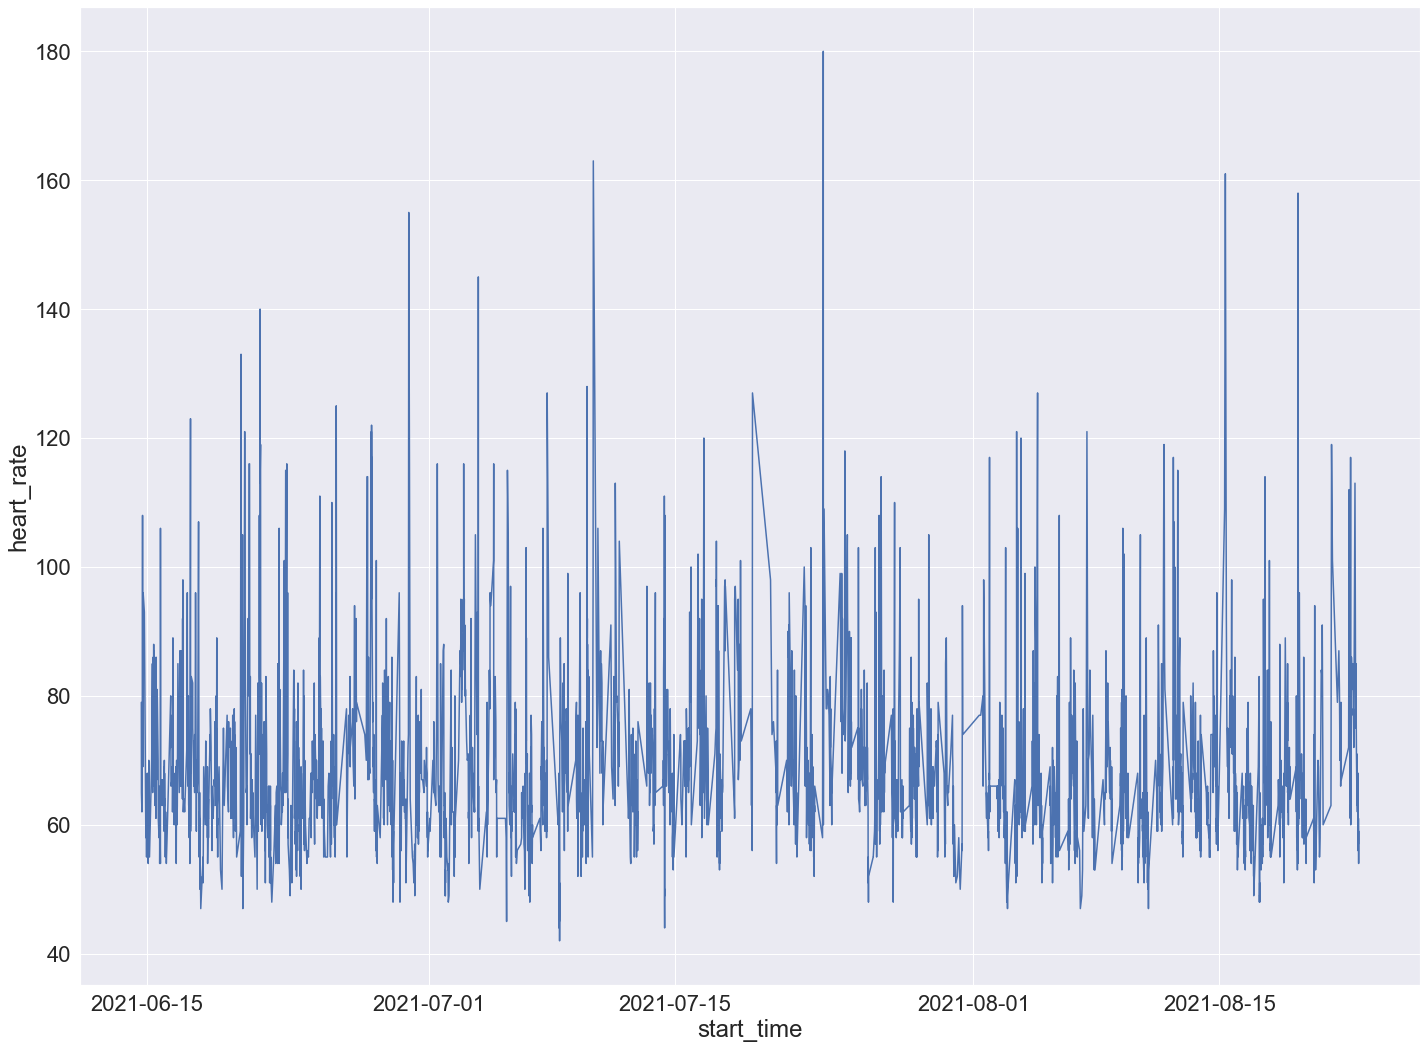

In [34]:
sns.lineplot(x= 'start_time', y= 'heart_rate', data=train)
sns.set(rc={'figure.figsize':(24,18)})

y_train.resample('48H').mean().plot(title='2 day average')Takeaways:
- Peaks may be when active and low peaks may be sedentary.

Arguments for .resample:
- 3T= 3 minute bins
- 3S = 3 second bins
- 3H = 3 hour bins

Text(0, 0.5, 'Heart Rate')

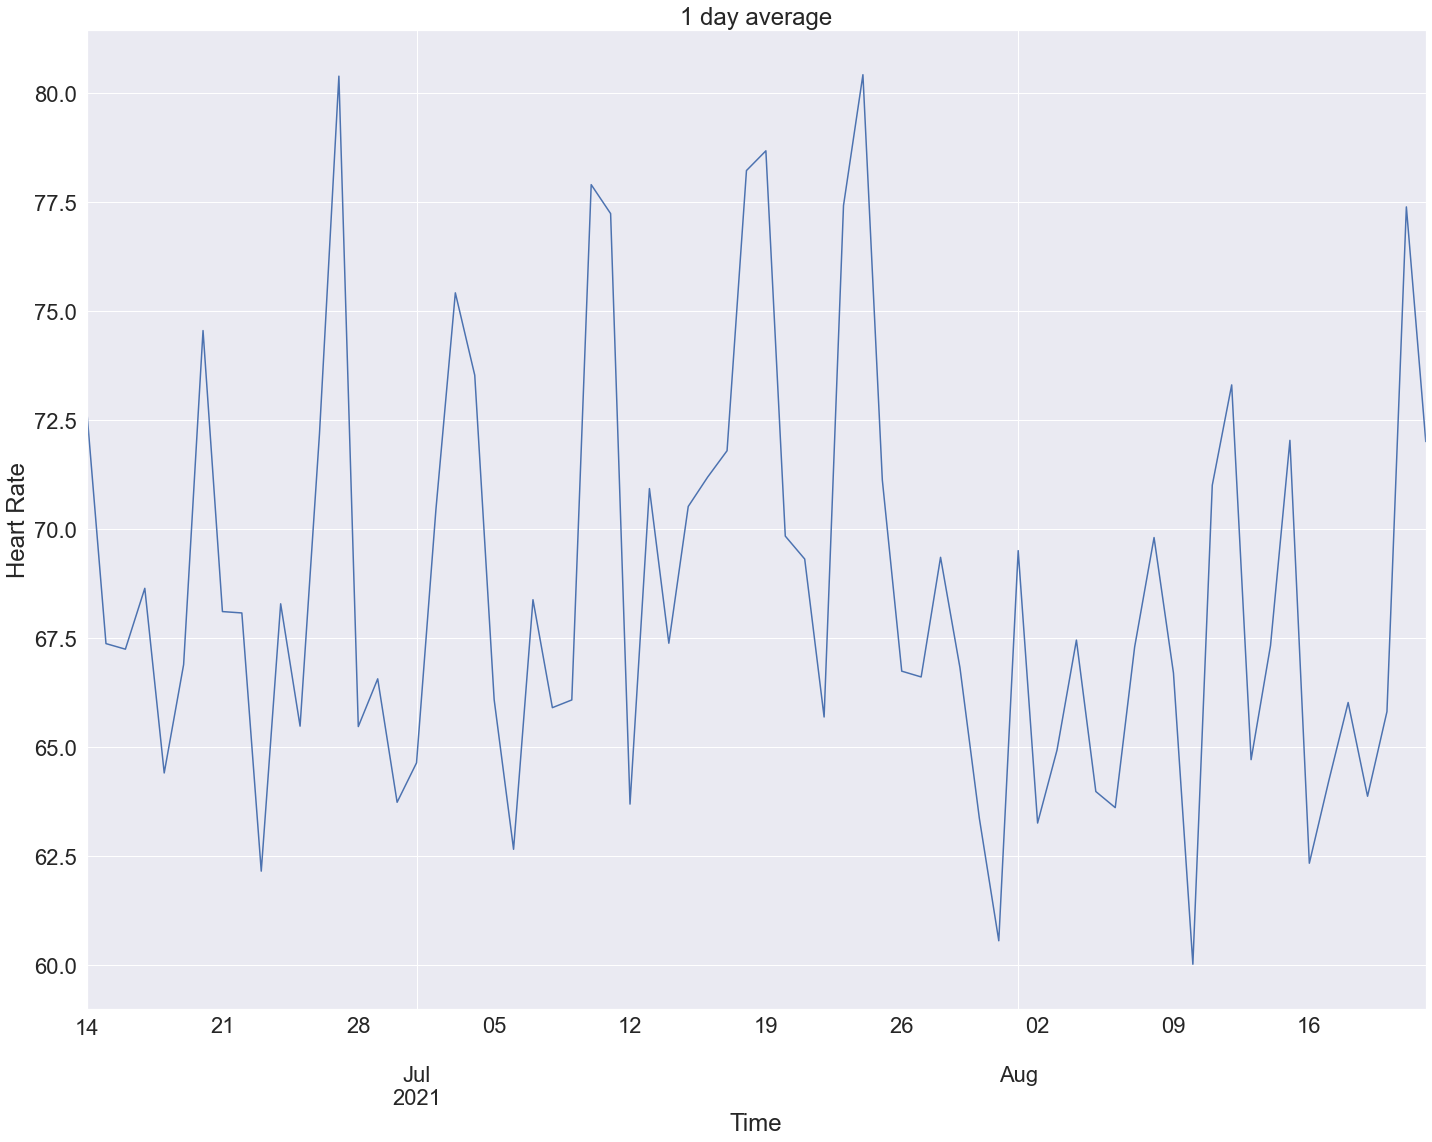

In [20]:
#1 Day average chart
sns.set(font_scale = 2) # change font size of chart labels
y_train.resample('24H').mean().plot(title='1 day average') #resample our target ('heart_rate') and visualize it over various time periods.
plt.xlabel('Time')
plt.ylabel('Heart Rate')

Text(0, 0.5, 'heart_rate')

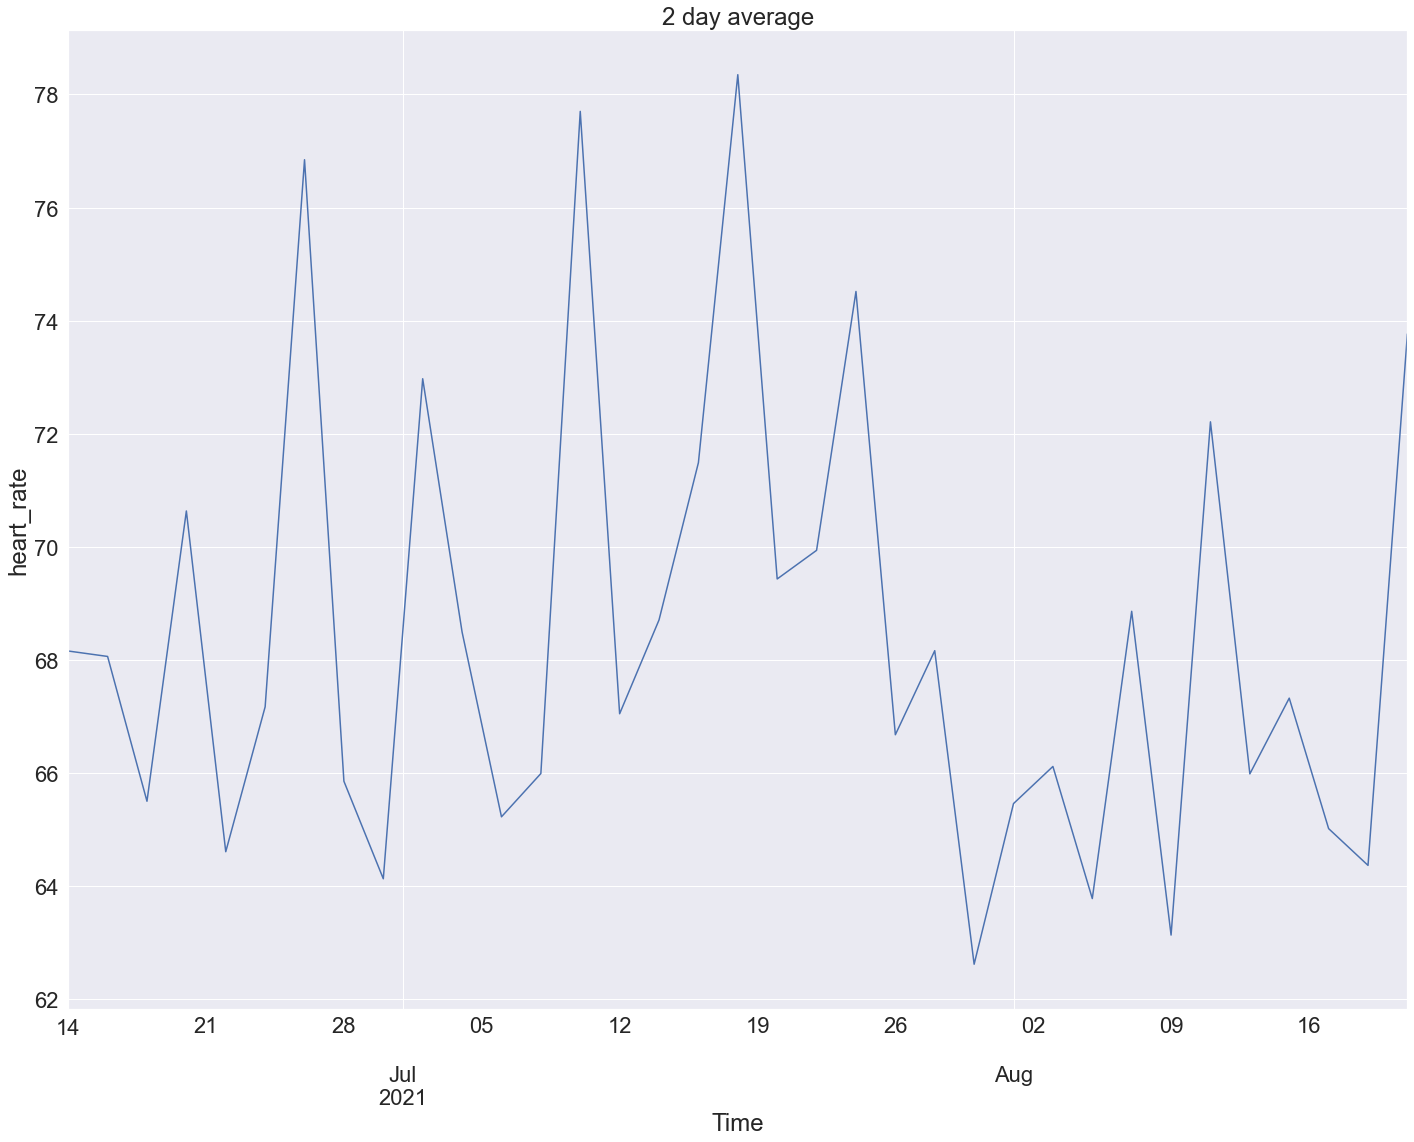

In [21]:
# 2 day average visual
sns.set(font_scale = 2) # change font size of chart labels
y_train.resample('48H').mean().plot(title='2 day average')  #resample our target ('heart_rate') and visualize it over various time periods.
plt.xlabel('Time')
plt.ylabel('heart_rate')

Text(0, 0.5, 'heart_rate')

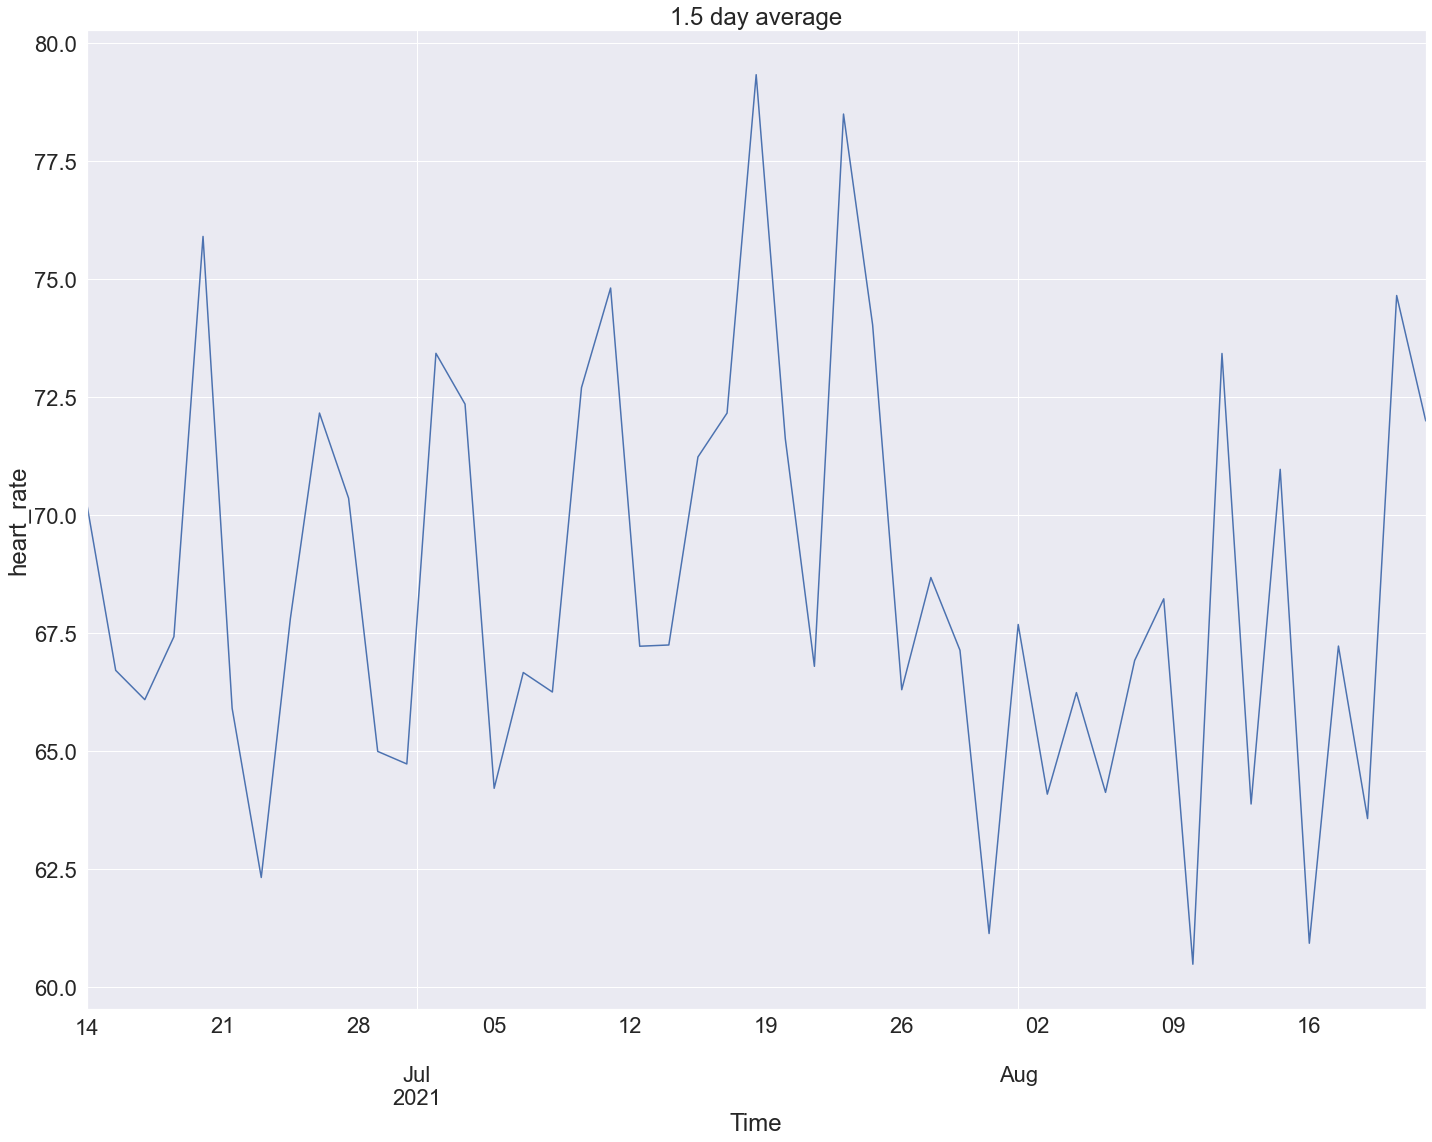

In [22]:
# 2 day average visual
sns.set(font_scale = 2) # change font size of chart labels
y_train.resample('36H').mean().plot(title='1.5 day average')  #resample our target ('heart_rate') and visualize it over various time periods.
plt.xlabel('Time')
plt.ylabel('heart_rate')

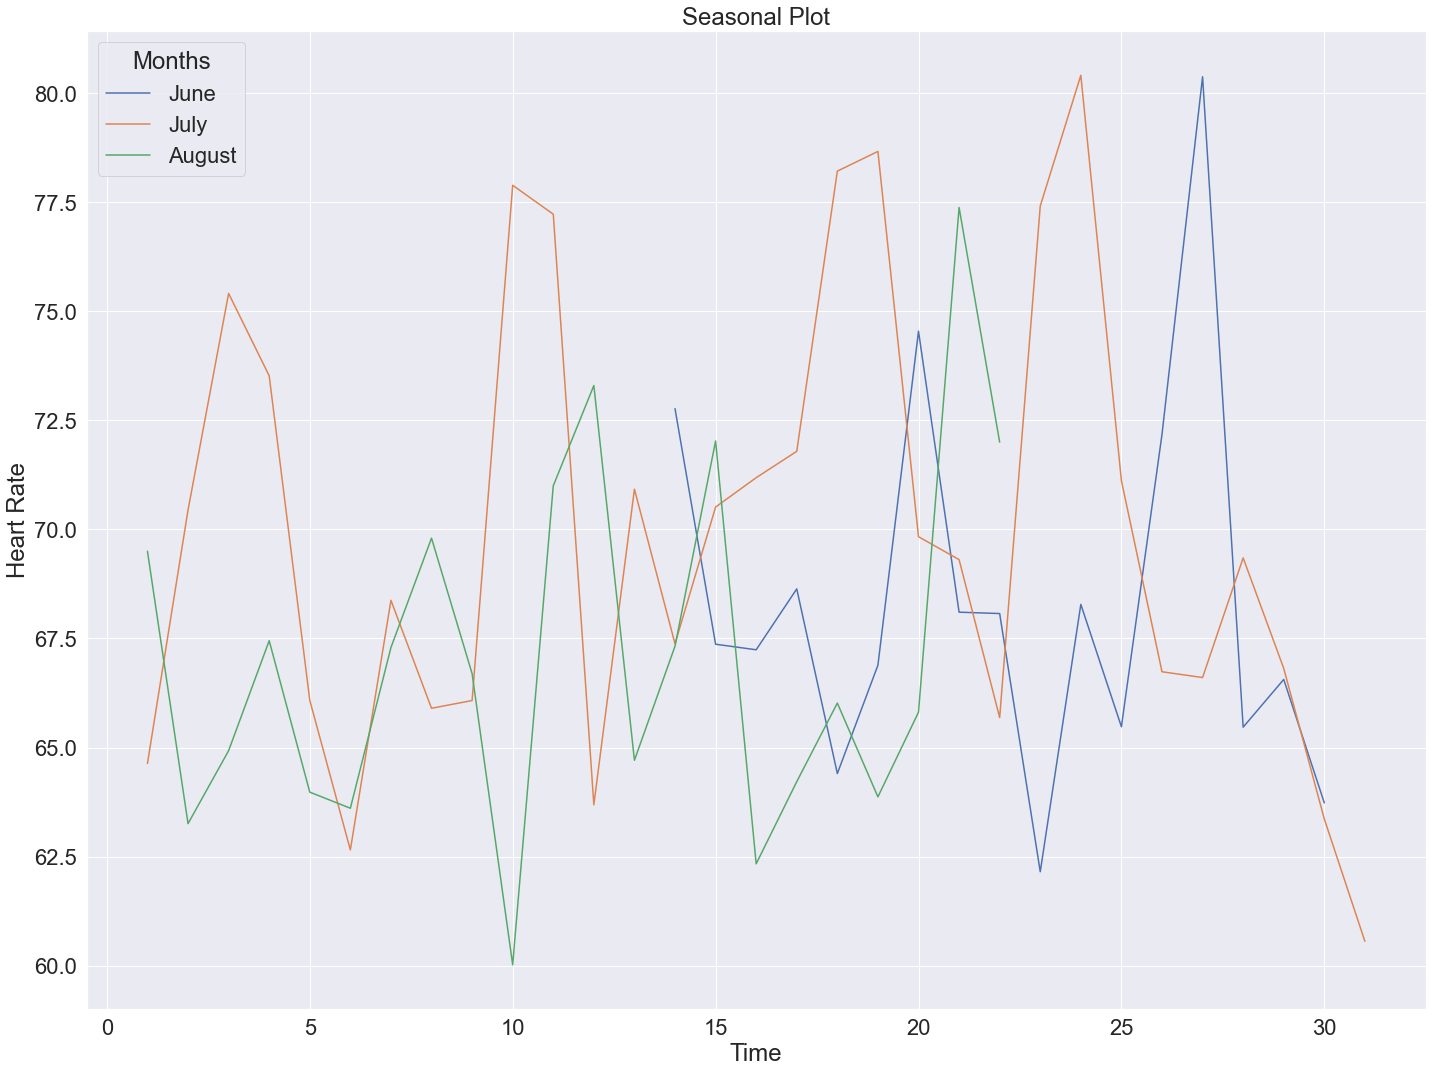

In [23]:
#seasonal plot is one that shows the comparison of multiple days together
y_train.groupby([y_train.index.month, y_train.index.day]).mean().unstack(0).plot(title='Seasonal Plot')

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend(title='Months', loc='upper left', labels=['June', 'July', 'August'])

- No seasonal pattern seen in the 3 months.

In [24]:
train

,heart_rate,max,month,day,weekday
start_time,,,,,
2021-08-11 16:05:50,62,75,8,8,Wednesday
2021-06-22 11:58:04,58,98,6,6,Tuesday
2021-08-06 10:01:40,62,75,8,8,Friday
2021-07-08 17:28:09,56,101,7,7,Thursday
2021-08-17 17:51:06,58,98,8,8,Tuesday
...,...,...,...,...,...
2021-08-18 12:00:00,70,111,8,8,Wednesday
2021-07-25 19:00:00,84,99,7,7,Sunday
2021-06-29 09:23:33,68,101,6,6,Tuesday


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,this_week,max,month,day,the_next_week
start_time,,,,,
2021-06-20,68.026042,96.966146,6.000000,6.000000,68.096257
2021-06-27,68.096257,95.836898,6.000000,6.000000,68.190058
2021-07-04,68.190058,96.763158,6.508772,6.508772,68.642405
2021-07-11,68.642405,94.177215,7.000000,7.000000,69.550725
2021-07-18,69.550725,98.188406,7.000000,7.000000,71.904348
2021-07-25,71.904348,99.334783,7.000000,7.000000,66.996169
2021-08-01,66.996169,96.229885,7.114943,7.114943,65.474843
2021-08-08,65.474843,92.311321,8.000000,8.000000,67.785894
2021-08-15,67.785894,93.357683,8.000000,8.000000,65.997024


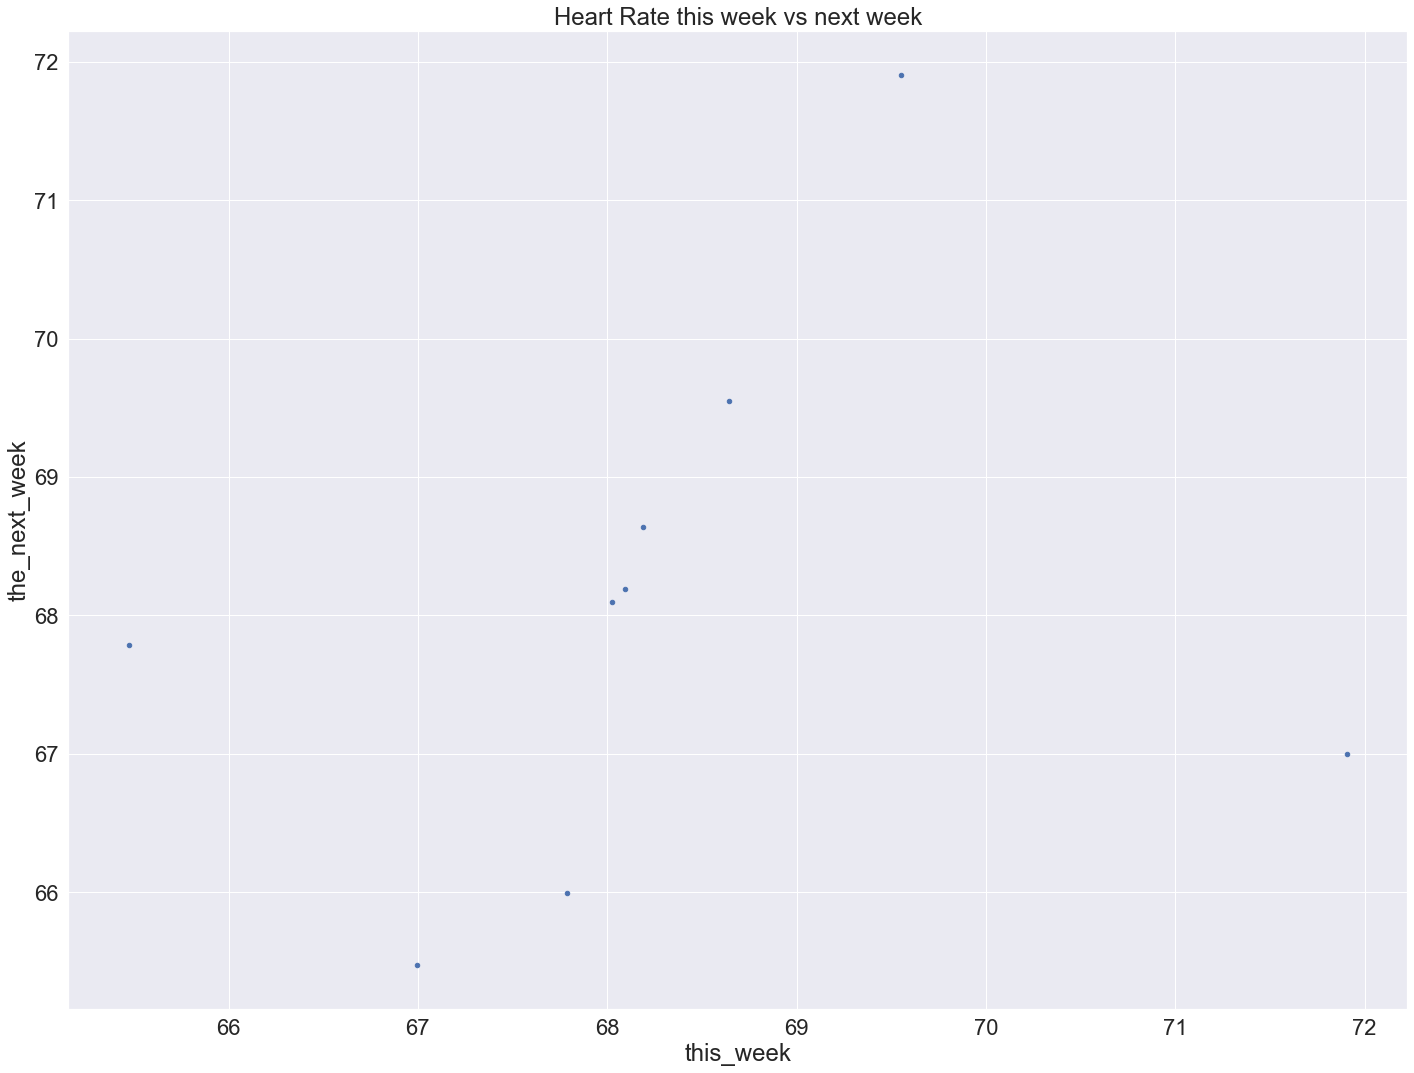

In [32]:
#visual for 2 weeks
weekly = train.resample('W').mean() #create new dataframe with target resampled by week
weekly['the_next_week'] = weekly.heart_rate.shift(-1) #create new column for next week by shifting
weekly = weekly.rename(columns={'heart_rate': 'this_week'}) # rename heart_rate column to this week
weekly.plot.scatter(x='this_week', y='the_next_week') # plot this_week vs next_week
plt.title('Heart Rate this week vs next week') #chart title
weekly # print weekly dataframe

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

Takeaway: Difficult to see a pattern here. We may not have enough data.